# Vehicle Emissions
#### Riley Hora

### Project Topic

CO2 levels indicate total emissions output for vehicles, which can have many negative effects to human and environmental health.

The goal of this project is to analyze emission levels based on vehicle characteristics. Then a future iteration will predict emissions based on vehicle characteristics using a regression model. This may help manufactures produce environmentally friendly cars and encourage consumers to make healthy buying decisions.

My prediction is higher displacement engines will produce more C02 emissions and the start stop feature will predict lower emissions.

### Bonus
This project is not on UCI Machine Learning Repository. I am motivated to research this topic because my interest in keeping vehicles for hobbyists but reducing pollution for everyone's health.

### Data
The Environmental Protection Agency’s National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, along with vehicle manufacturers under EPA oversight, conduct vehicle testing to produce this data set. Each vehicle is run through a standard of testing to record values such as miles to the gallon and CO2 output at the tailpipe. Testing procedures are specified in the _Code of Federal Regulations_.

U.S. Department of Energy. (2023). _Fuel Economy Guide_ [Database]. Retrieved from https://www.fueleconomy.gov/feg/download.shtml

The data contains 46,318 unique vehicles/samples and 83 specifications/features. In an uncompressed csv file the data is 19 MB. After cleaning there are 45,812 vehicles/samples.

Although there are 83 features, the focus is on the following-

id- vehicle record id\
make- manufacturer (division)\
model- model name (carline)\
transmission- if 1, this vehicle has an auto transmission\
displacement- engine displacement in liters\
cylinders- number of engine cylinders\
sCharger- forced induction through a supercharged\
tCharger- forced induction through a turbocharged\
startStop- stop-start technology, the vehicle will automatically turn off when coming to a stop and then back on when ready to drive\
drive- if 1, 4 or All-Wheel drive\
MPGcomb- combined miles per gallon for all fuel types\
co2comb- combined tailpipe CO2 in grams/mile for all fuel types\

### Data Cleaning Process
The data set is tabular but contains lots of data that is not desirable for this project.\
\
First miles per gallon is combined across fuel types. This means a hybrid car's gasoline and electric engines are taken into consideration for this measurement.
\
The same is applied for CO2 emissions at the tailpipe, they are combined if the vehicle has several fuel types.\
\
Then twelve of the eighty-three features are selected.\
\
Some examples of why I did not use the other data points are that unrounded mpg was only reported on a small percentage of the vehicles. Another is we do not need a unique description of the engine name because this project is focused on general features rather than manufacturer differences.\
\
This project contains fewer features to make it easier to understand. A possible future iteration of this project might include more features such as luggage volume or a vehicles time to recharge if it is electric.\
\
Next the features of start stop, turbocharger and supercharger are converted to 0 and 1. 1 indicates the vehicle does have the feature and 0 means the vehicle does not.\
\
The same idea was applied for transmission type and how many wheels are driven. All wheel or 4-wheel drive is 1 and 2-wheel drive is 0 and finally automatic is 1 and 0 is manual.\
506 vehicles are missing data for at least one of the twelve features and were discarded from the data set.\
\
The benefits of discarding these vehicles with missing data are persevering data integrity. This removed zeros that would skew the data analysis. This also mean there is only real data in the dataset, none of it is interpolated or substituted. The draw back to discarding the entire vehicle, is all of it's data is no longer in the data set. Only 503 of the vehicles were dropped out of 46,318 unique vehicles.\
\
Lastly some of the features were renamed so they are easier to understand.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("vehicles.csv", low_memory=False)
#print(df.columns)

In [3]:
## Clean Data

# Combine co2 emissions for fuel type 1 and 2
df['co2Gpm'] = df['co2TailpipeGpm'] + df['co2TailpipeAGpm']

# Combine MPG fo fuel type 1 and 2
df['MPGcomb'] = df['comb08'] + df['combA08']

# Remove unwanted columns
columns_to_keep = ['id', 'make', 'model', 'trany', 'displ', 'fuelType', 'cylinders', 'sCharger', 'tCharger', 'startStop', 'drive', 'MPGcomb', 'co2Gpm']
df = df[columns_to_keep]

# Convert startStop, sCharger and tCharger to 0 and 1
df['startStop'] = df['startStop'].map({'Y': 1, 'N': 0}).fillna(0).astype(int)
df['sCharger'] = df['sCharger'].map({'S': 1, 'N': 0}).fillna(0).astype(int)
df['tCharger'] = df['tCharger'].map({'T': 1, 'N': 0}).fillna(0).astype(int)

# Convert Transmission to just Automatic and Manual to 0 and 1
df['trany'] = df['trany'].apply(lambda x: 1 if isinstance(x, str) and x.startswith('A') else 0).astype(int)

#Convert Drive types 
df['drive'] = df['drive'].map({'4-Wheel or All-Wheel Drive': 1, '4-Wheel Drive': 1, 'All-Wheel Drive': 1, 'Rear-Wheel Drive': 0, 'Front-Wheel Drive': 0}).fillna(0).astype(int)


# Drop rows with missing data
df.dropna(inplace=True)

# No outliers to be removed

# Change column labels
df.rename(columns={'trany': 'transmission'}, inplace=True)
df.rename(columns={'displ': 'displacement'}, inplace=True)

In [4]:
#print(df.info())

In [5]:
# Print first 10 vehicles
print(df.head(5))
# Print random sample of 10 vehicles
#print(df.sample(10))

      id        make                model  transmission  displacement   
0      1  Alfa Romeo   Spider Veloce 2000             0           2.0  \
1     10     Ferrari           Testarossa             0           4.9   
2    100       Dodge              Charger             0           2.2   
3   1000       Dodge  B150/B250 Wagon 2WD             1           5.2   
4  10000      Subaru     Legacy AWD Turbo             0           2.2   

  fuelType  cylinders  sCharger  tCharger  startStop  drive  MPGcomb   
0  Regular        4.0         0         0          0      0       21  \
1  Regular       12.0         0         0          0      0       11   
2  Regular        4.0         0         0          0      0       27   
3  Regular        8.0         0         0          0      0       11   
4  Premium        4.0         0         1          0      1       19   

       co2Gpm  
0  423.190476  
1  807.909091  
2  329.148148  
3  807.909091  
4  467.736842  


### Exploratory Data Analysis

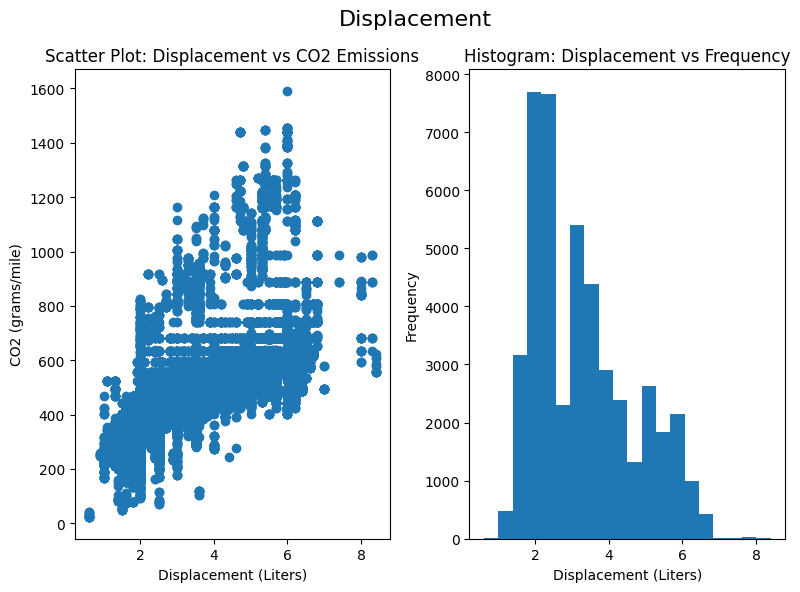

In [6]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Displacement', x=.35, y=.98, fontsize=16)
    # Scatter plot
scatterp = plt.subplot(1, 3, 1)
plt.scatter(df['displacement'], df['co2Gpm'])
plt.xlabel('Displacement (Liters)')
plt.ylabel('CO2 (grams/mile)')
plt.title('Scatter Plot: Displacement vs CO2 Emissions')

    # Histogram
histogramp = plt.subplot(1, 3, 2)
plt.hist(df['displacement'], bins=20)
plt.xlabel('Displacement (Liters)')
plt.ylabel('Frequency')
plt.title('Histogram: Displacement vs Frequency')
plt.tight_layout()
plt.show()

Distribution of Displacement: To understand the distribution of Displacement in the dataset, a histogram was plotted. Each bar in the histogram represents the displacement of the engine in liters. Most of the vehicles have a displacement of around 2 liters, with another chunk around 4 and 6 liters in the dataset.

Scatter Plot Displacement vs CO2 Emissions: 
A scatter plot was created to examine the relationship between Displacement and CO2 emissions. Each data point represents a vehicle, with the Displacement on the x-axis and CO2 emissions in grams per mile on the y-axis. The scatter plot provides an overview of how different displacements contribute to CO2 emissions. The plot shows that there is some variation in CO2 emissions across different displacements, indicating that displacement may impact the level of emissions. Looking at the plot, there is a positive trend as displacement increases so does CO2 emissions.

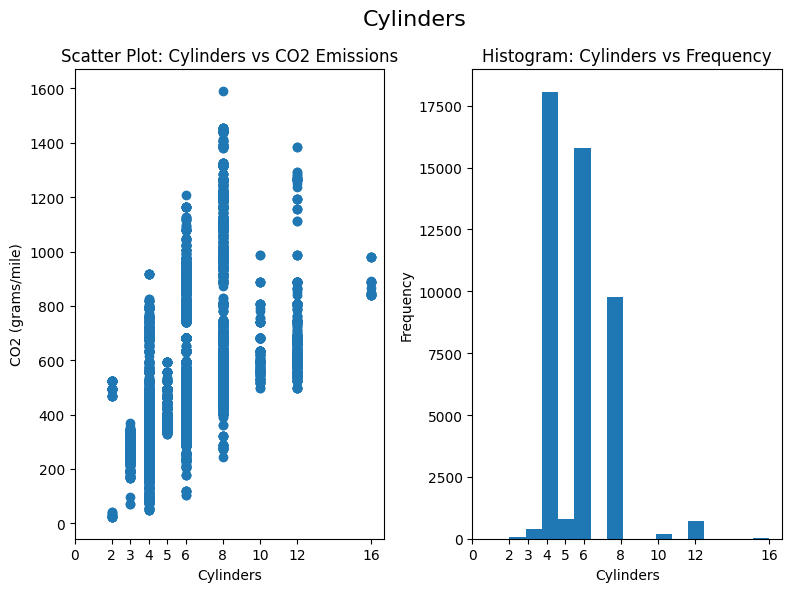

In [7]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Cylinders', x=.35, y=.98, fontsize=16)
    # Scatter plot
scatterp = plt.subplot(1, 3, 1)
plt.scatter(df['cylinders'], df['co2Gpm'])
plt.xlabel('Cylinders')
scatterp.set_xticks([0, 2, 3, 4, 5, 6, 8, 10, 12, 16])
plt.ylabel('CO2 (grams/mile)')
plt.title('Scatter Plot: Cylinders vs CO2 Emissions')

    # Histogram
histogramp = plt.subplot(1, 3, 2)
plt.hist(df['cylinders'], bins=16)
plt.xlabel('Cylinders')
histogramp.set_xticks([0, 2, 3, 4, 5, 6, 8, 10, 12, 16])
plt.ylabel('Frequency')
plt.title('Histogram: Cylinders vs Frequency')
plt.tight_layout()
plt.show()

Distribution of Cylinders: To understand the distribution of Cylinders in the dataset, a histogram was plotted. Each bar in the histogram represents the number of cylinders of the engine. Most of the vehicles have a 4, 6 or 8 cylinders, with some other having 2,3,5,10,12
and 16 cylinders in the dataset.

Cars with 2 cylinders: 63\
Cars with 3 cylinders: 399\
Cars with 4 cylinders: 18070\
Cars with 5 cylinders: 777\
Cars with 6 cylinders: 15779\
Cars with 8 cylinders: 9790\
Cars with 10 cylinders: 199\
Cars with 12 cylinders: 715\
Cars with 16 cylinders: 20

Scatter Plot Cylinders vs CO2 Emissions: 
A scatter plot was created to examine the relationship between Cylinders and CO2 emissions. Each data point represents a vehicle, with the Cylinders on the x-axis and CO2 emissions in grams per mile on the y-axis. The scatter plot provides an overview of how different number of cylinders contribute to CO2 emissions. The plot shows that there is some variation in CO2 emissions across different number of cylinders, indicating that number of cylinders may impact the level of emissions.
Looking at the plot, there is a positive trend as number of cylinders increases so does CO2 emissions.

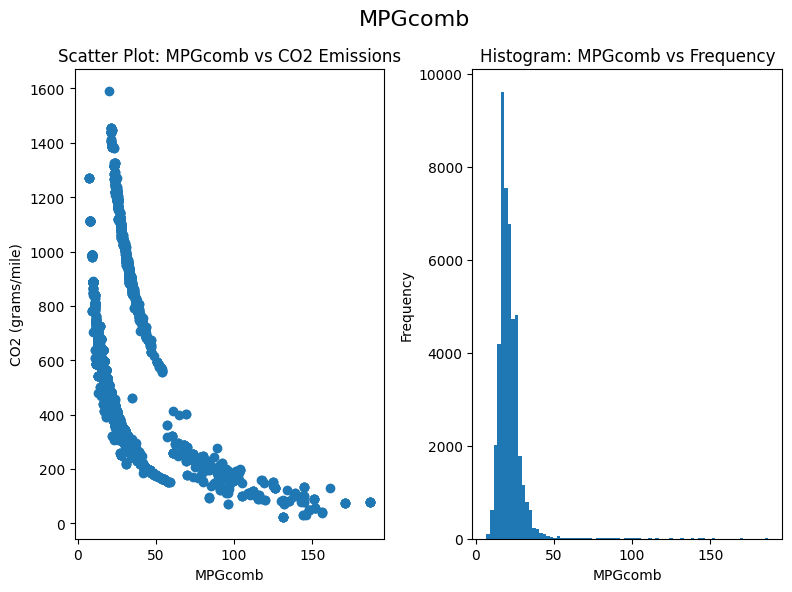

In [8]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('MPGcomb', x=.35, y=.98, fontsize=16)
    # Scatter plot
scatterp = plt.subplot(1, 3, 1)
plt.scatter(df['MPGcomb'], df['co2Gpm'])
plt.xlabel('MPGcomb')
plt.ylabel('CO2 (grams/mile)')
plt.title('Scatter Plot: MPGcomb vs CO2 Emissions')
    # Histogram
histogramp = plt.subplot(1, 3, 2)
plt.hist(df['MPGcomb'], bins=80)
plt.xlabel('MPGcomb')
plt.ylabel('Frequency')
plt.title('Histogram: MPGcomb vs Frequency')
plt.tight_layout()
plt.show()

Distribution of MPGcomb: To understand the distribution of MPGcomb in the dataset, a histogram was plotted. Each bar in the histogram represents the miles per gallon, city and highway combined, of the vehicle. Most of the vehicles are from 20-40 miles per gallon, with some others way over 50 miles per gallon.

Cars in each MPGcomb bin(20):\
(16.0, 25.0]:      28081\
(6.82, 16.0]:       9515\
(25.0, 34.0]:       6763\
(34.0, 43.0]:        920\
(43.0, 52.0]:        196\
(52.0, 61.0]:         55\
(61.0, 70.0]:         43\
(79.0, 88.0]:         37\
(70.0, 79.0]:         34\
(88.0, 97.0]:         34\
(97.0, 106.0]:        33\
(142.0, 151.0]:       26\
(124.0, 133.0]:       22\
(106.0, 115.0]:       15\
(133.0, 142.0]:       11\
(115.0, 124.0]:        8\
(151.0, 160.0]:        7\
(178.0, 187.0]:        6\
(169.0, 178.0]:        5\
(160.0, 169.0]:        1

Scatter Plot MPGcomb vs CO2 Emissions: 
A scatter plot was created to examine the relationship between MPGcomb and CO2 emissions. Each data point represents a vehicle, with the MPGcomb on the x-axis and CO2 emissions in grams per mile on the y-axis. The scatter plot provides an overview of how MPGcomb contribute to CO2 emissions. The plot shows that there is some variation in CO2 emissions across different MPGcomb, indicating that MPGcomb may impact the level of emissions.
Looking at the plot, there is a negative trend as MPGcomb increases the CO2 emissions decreases. If a vehicle is burning less fuel per mile, it might also produce less emissions from burning less fuel.
There are also three groupings, which are not divided by cylinder count. The origin of the separation is unknown.

In [9]:
# Divide the data into 20 bins
#mpgcomb_bins = pd.cut(df['MPGcomb'], bins=20)

# Count the number of cars in each bin
#mpgcomb_counts = mpgcomb_bins.value_counts()

# Print the results
#print("Cars in each MPGcomb bin:")
#print(mpgcomb_counts)

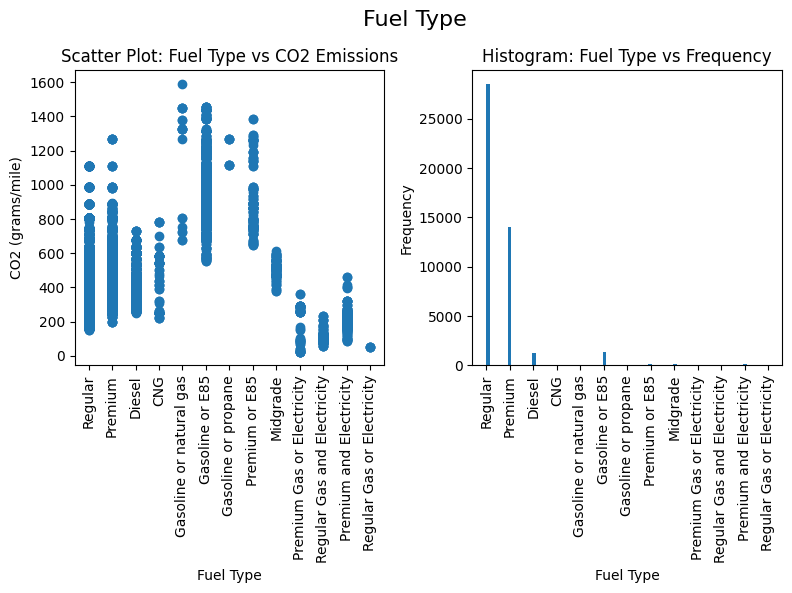

In [10]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Fuel Type', x=.35, y=.98, fontsize=16)
    # Scatter plot
scatterp = plt.subplot(1, 3, 1)
plt.scatter(df['fuelType'], df['co2Gpm'])
plt.xlabel('Fuel Type')
plt.xticks(rotation='vertical', ha='center')
plt.ylabel('CO2 (grams/mile)')
plt.title('Scatter Plot: Fuel Type vs CO2 Emissions')

    # Histogram
histogramp = plt.subplot(1, 3, 2)
plt.hist(df['fuelType'], bins=80)
plt.xlabel('Fuel Type')
plt.xticks(rotation='vertical', ha='center')
plt.ylabel('Frequency')
plt.title('Histogram: Fuel Type vs Frequency')
plt.tight_layout()
plt.show()

Distribution of Fuel Types: To understand the distribution of fuel types in the dataset, a histogram was plotted. Each bar in the histogram represents specific fuel type. Most of the vehicles burn Regular or Premium Gasoline in the dataset, followed by a smaller number of diesel, hybrid, and electric cars.

Scatter Plot Fuel Type vs CO2 Emissions: 
A scatter plot was created to examine the relationship between fuel type and CO2 emissions. Each data point represents a vehicle, with the fuel type on the x-axis and CO2 emissions in grams per mile on the y-axis. The scatter plot provides an overview of how different fuel types contribute to CO2 emissions. The plot shows that there is some variation in CO2 emissions across different fuel types, indicating that the type of fuel used may impact the level of emissions. Electric and Hybrid Vehicles seem to have the lowest emissions output. Gasoline and Diesel seem to have similar emissions followed by E85 with the highest output of CO2.

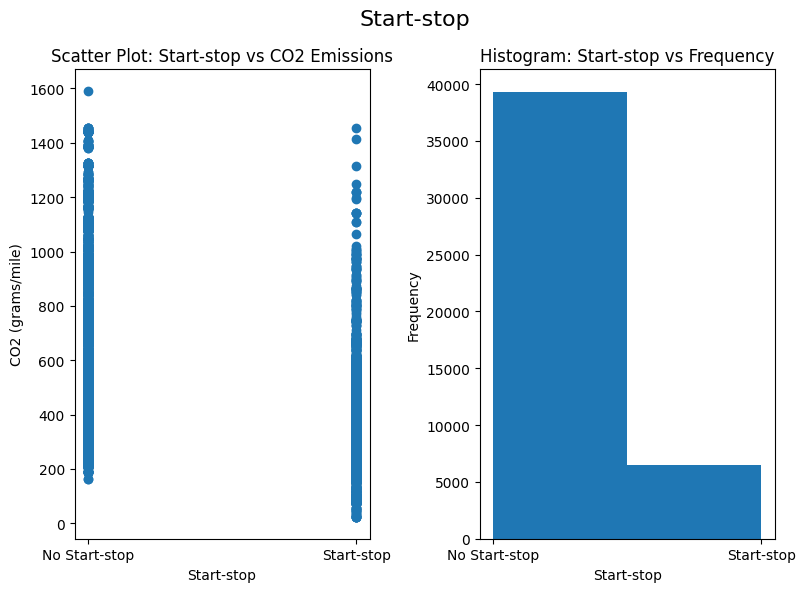

In [11]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Start-stop', x=.35, y=.98, fontsize=16)
    # Scatter plot
scatterp = plt.subplot(1, 3, 1)
plt.scatter(df['startStop'], df['co2Gpm'])
plt.xlabel('Start-stop')
scatterp.set_xticks([0, 1])
scatterp.set_xticklabels(['No Start-stop', 'Start-stop'])
plt.ylabel('CO2 (grams/mile)')
plt.title('Scatter Plot: Start-stop vs CO2 Emissions')

    # Histogram
histogramp = plt.subplot(1, 3, 2)
plt.hist(df['startStop'], bins=2)
plt.xlabel('Start-stop')
histogramp.set_xticks([0, 1])
histogramp.set_xticklabels(['No Start-stop', 'Start-stop'])
plt.ylabel('Frequency')
plt.title('Histogram: Start-stop vs Frequency')
plt.tight_layout()
plt.show()

Distribution of Start-stop:
To understand the distribution of Start-stop in the dataset, a histogram was plotted. Each bar in the histogram represents having Start-stop or not having Start-stop. 39336 vehicles have Start-stop in the data set and 6476 do not.

Scatter Plot Start-stop vs CO2 Emissions:
A scatter plot was created to examine the relationship between Start-stop and CO2 emissions. Each data point represents a vehicle, with the Start-stop on the x-axis and CO2 emissions in grams per mile on the y-axis. The scatter plot provides an overview of how having Start-stop or not contribute to CO2 emissions.

The plot shows that there is some variation in CO2 emissions across having Start-stop and not, indicating that the Start-stop may impact the level of emissions. Start-stop equipped vehicles seem to have significantly lower CO2 emissions output possibilities.

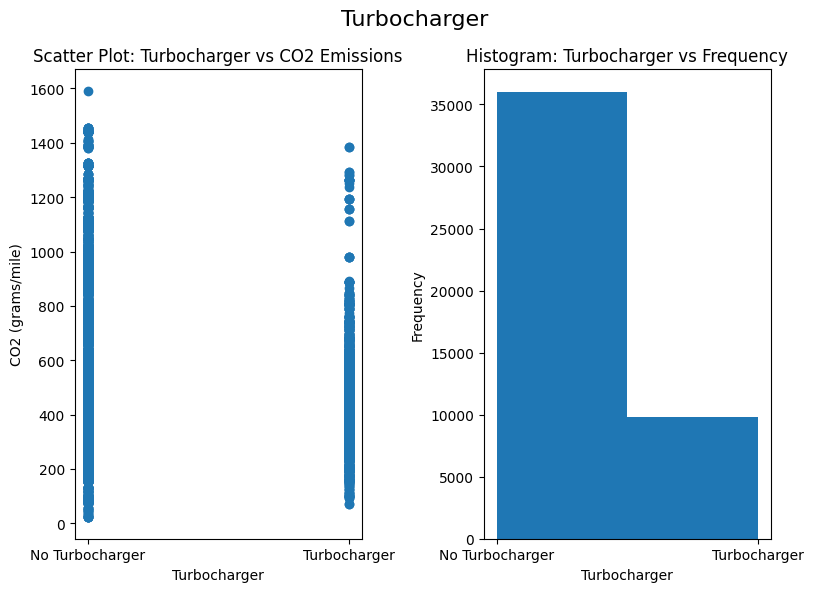

In [12]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Turbocharger', x=.35, y=.98, fontsize=16)
    # Scatter plot
scatterp = plt.subplot(1, 3, 1)
plt.scatter(df['tCharger'], df['co2Gpm'])
plt.xlabel('Turbocharger')
scatterp.set_xticks([0, 1])
scatterp.set_xticklabels(['No Turbocharger', 'Turbocharger'])
plt.ylabel('CO2 (grams/mile)')
plt.title('Scatter Plot: Turbocharger vs CO2 Emissions')

    # Histogram
histogramp = plt.subplot(1, 3, 2)
plt.hist(df['tCharger'], bins=2)
plt.xlabel('Turbocharger')
histogramp.set_xticks([0, 1])
histogramp.set_xticklabels(['No Turbocharger', 'Turbocharger'])
plt.ylabel('Frequency')
plt.title('Histogram: Turbocharger vs Frequency')
plt.tight_layout()
plt.show()

Distribution of Turbocharger:
To understand the distribution of Turbocharger in the dataset, a histogram was plotted. Each bar in the histogram represents having a Turbocharger or not having a Turbocharger. 9784 vehicles have turbochargers in the data set and 36028 do not.

Scatter Plot Turbocharger vs CO2 Emissions:
A scatter plot was created to examine the relationship between Turbocharger and CO2 emissions. Each data point represents a vehicle, with the Turbocharger on the x-axis and CO2 emissions in grams per mile on the y-axis. The scatter plot provides an overview of how having a Turbocharger or not contribute to CO2 emissions.

The plot shows that there is some variation in CO2 emissions across having a Turbocharger and not, indicating that the Turbocharger may impact the level of emissions. Turbocharger equipped vehicles seem to have a bit lower CO2 emissions output.

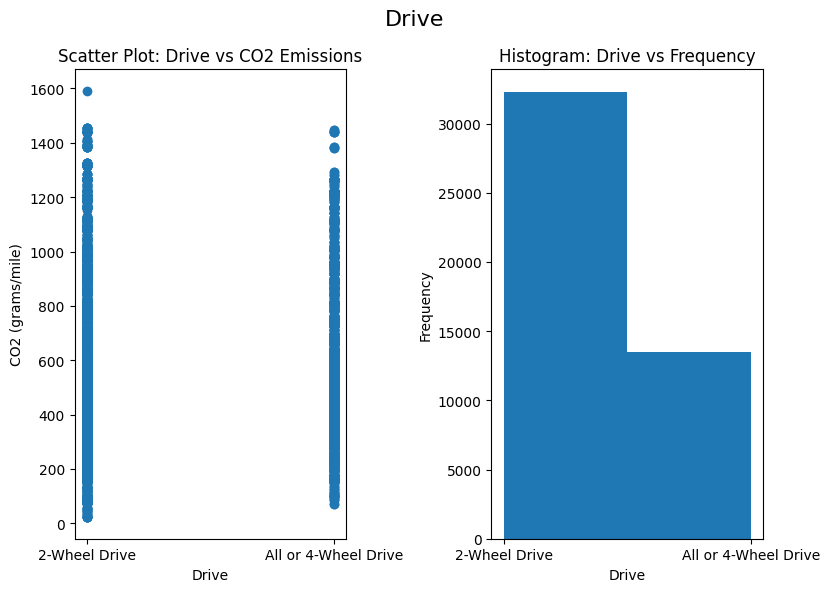

In [13]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Drive', x=.35, y=.98, fontsize=16)
    # Scatter plot
scatterp = plt.subplot(1, 3, 1)
plt.scatter(df['drive'], df['co2Gpm'])
plt.xlabel('Drive')
scatterp.set_xticks([0, 1])
scatterp.set_xticklabels(['2-Wheel Drive', 'All or 4-Wheel Drive'])
plt.ylabel('CO2 (grams/mile)')
plt.title('Scatter Plot: Drive vs CO2 Emissions')

    # Histogram
histogramp = plt.subplot(1, 3, 2)
plt.hist(df['drive'], bins=2)
plt.xlabel('Drive')
histogramp.set_xticks([0, 1])
histogramp.set_xticklabels(['2-Wheel Drive', 'All or 4-Wheel Drive'])
plt.ylabel('Frequency')
plt.title('Histogram: Drive vs Frequency')
plt.tight_layout()
plt.show()

Distribution of Drive:
To understand the distribution of Drive type in the dataset, a histogram was plotted. Each bar in the histogram represents 2-Wheel Drive or All and 4-wheel drive. 13511 vehicles have All or 4-Wheel drive in the data set and 32301 are 2-Wheel Drive.


Scatter Plot Drive vs CO2 Emissions:
A scatter plot was created to examine the relationship between Drive type and CO2 emissions. Each data point represents a vehicle, with the Drive on the x-axis and CO2 emissions in grams per mile on the y-axis. The scatter plot provides an overview of how having All or 4-wheel Drive or 2-Wheel Drive contribute to CO2 emissions.

The plot shows very little in comparing the drive types. 2-Wheel drive vehicles have some data points that are lower in CO2 output. This indicates that 2-Wheel drive give a possibility for lower CO2 emissions.

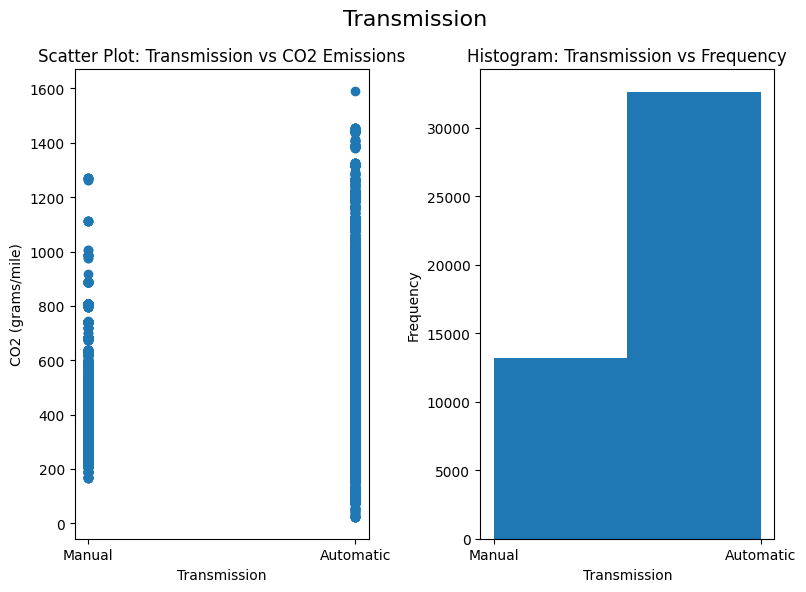

In [14]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Transmission', x=.35, y=.98, fontsize=16)
    # Scatter plot
scatterp = plt.subplot(1, 3, 1)
plt.scatter(df['transmission'], df['co2Gpm'])
plt.xlabel('Transmission')
scatterp.set_xticks([0, 1])
scatterp.set_xticklabels(['Manual', 'Automatic'])
plt.ylabel('CO2 (grams/mile)')
plt.title('Scatter Plot: Transmission vs CO2 Emissions')

    # Histogram
histogramp = plt.subplot(1, 3, 2)
plt.hist(df['transmission'], bins=2)
plt.xlabel('Transmission')
histogramp.set_xticks([0, 1])
histogramp.set_xticklabels(['Manual', 'Automatic'])
plt.ylabel('Frequency')
plt.title('Histogram: Transmission vs Frequency')
plt.tight_layout()
plt.show()

Distribution of Transmission:
To understand the distribution of Transmission type in the dataset, a histogram was plotted. Each bar in the histogram represents having an automatic transmission or manual transmission. 32649 vehicles have automatic transmissions in the data set and 13163 have manual transmissions.

Scatter Plot Transmission vs CO2 Emissions:
A scatter plot was created to examine the relationship between Transmission type and CO2 emissions. Each data point represents a vehicle, with the Transmission type on the x-axis and CO2 emissions in grams per mile on the y-axis. The scatter plot provides an overview of how having a automatic transmission or manual transmission contribute to CO2 emissions.

The plot shows that there is some variation in CO2 emissions across having a automatic transmission and manual transmission, indicating that transmission type may impact the level of emissions. Automatic transmission vehicles have data points that are lower in CO2 output than the manuals, indicating it's possible for automatic vehicles to have fewer CO2 emissions.

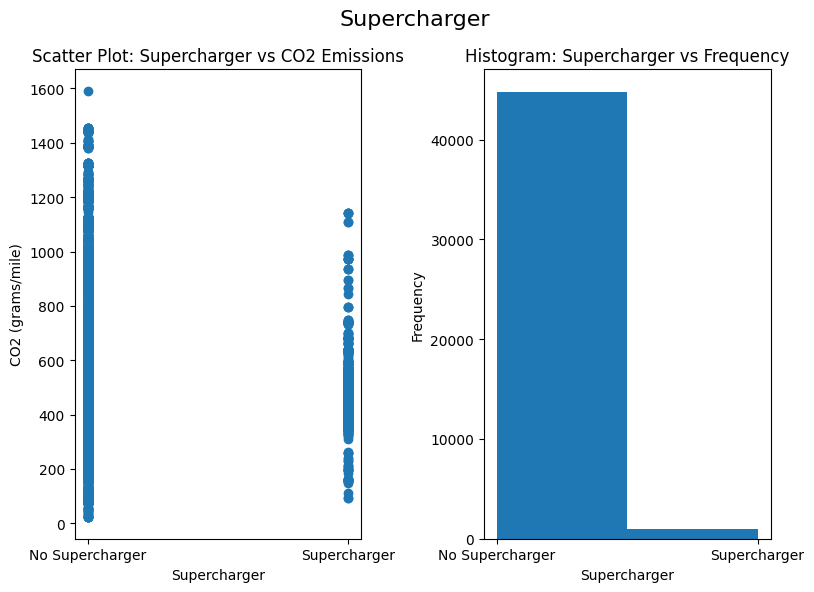

In [15]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Supercharger', x=.35, y=.98, fontsize=16)
    # Scatter plot
scatterp = plt.subplot(1, 3, 1)
plt.scatter(df['sCharger'], df['co2Gpm'])
plt.xlabel('Supercharger')
scatterp.set_xticks([0, 1])
scatterp.set_xticklabels(['No Supercharger', 'Supercharger'])
plt.ylabel('CO2 (grams/mile)')
plt.title('Scatter Plot: Supercharger vs CO2 Emissions')

    # Histogram
histogramp = plt.subplot(1, 3, 2)
plt.hist(df['sCharger'], bins=2)
plt.xlabel('Supercharger')
histogramp.set_xticks([0, 1])
histogramp.set_xticklabels(['No Supercharger', 'Supercharger'])
plt.ylabel('Frequency')
plt.title('Histogram: Supercharger vs Frequency')
plt.tight_layout()
plt.show()

Distribution of Supercharger:
To understand the distribution of Supercharger in the dataset, a histogram was plotted. Each bar in the histogram represents having an Supercharger or not. 993 vehicles have a Supercharger in the data set and 44819 do not.

Scatter Plot Supercharger vs CO2 Emissions:
A scatter plot was created to examine the relationship between Supercharger and CO2 emissions. Each data point represents a vehicle, with Supercharger on the x-axis and CO2 emissions in grams per mile on the y-axis. The scatter plot provides an overview of how having a Supercharger or not contribute to CO2 emissions.

The plot shows that there is some variation in CO2 emissions across having a Supercharger and not, indicating that a Supercharger may impact the level of emissions. No supercharger vehicles have data points that are lower in CO2 output than vehicles with superchargers, indicating it's possible having a supercharger will increase CO2 emissions. It is also possible that only performance vehicles that have higher displacement and cylinders are equipped with supercharger and those other factors increase CO2 output.

In [16]:
df.describe()
#df.info()

,id,transmission,displacement,cylinders,sCharger,tCharger,startStop,drive,MPGcomb,co2Gpm
count,45812.000000,45812.000000,45812.000000,45812.000000,45812.000000,45812.000000,45812.000000,45812.000000,45812.000000,45812.000000
mean,23116.741574,0.712674,3.276559,5.705317,0.021676,0.213568,0.141360,0.294923,21.453462,478.542338
std,13454.758328,0.452520,1.355406,1.771482,0.145623,0.409830,0.348397,0.456013,8.982353,158.703427
min,1.000000,0.000000,0.600000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,22.000000
25%,11453.750000,0.000000,2.200000,4.000000,0.000000,0.000000,0.000000,0.000000,17.000000,386.391304
50%,23051.500000,1.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,20.000000,444.350000
75%,34748.250000,1.000000,4.200000,6.000000,0.000000,0.000000,0.000000,1.000000,24.000000,532.000000
max,46758.000000,1.000000,8.400000,16.000000,1.000000,1.000000,1.000000,1.000000,187.000000,1591.700000


In [17]:
# Get numeric columns for calculating medians
numeric_columns = df.select_dtypes(include=np.number).columns

# Calculate the median for each numeric column
medians = df[numeric_columns].median()

# Print the medians
print("Medians:")
print(medians)

Medians:
id              23051.50
transmission        1.00
displacement        3.00
cylinders           6.00
sCharger            0.00
tCharger            0.00
startStop           0.00
drive               0.00
MPGcomb            20.00
co2Gpm            444.35
dtype: float64


In [18]:
# encode to numerical values 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['fuelType_encoded'] = le.fit_transform(df['fuelType'])

selected_columns = ['transmission','fuelType_encoded', 'displacement', 'cylinders', 'sCharger', 'tCharger', 'startStop', 'drive', 'MPGcomb', 'co2Gpm']
subset_df = df[selected_columns]
correlation_matrix = subset_df.corr()
co2comb_correlations = correlation_matrix['co2Gpm']
print("Correlations")
print(co2comb_correlations)

Correlations
transmission        0.131713
fuelType_encoded   -0.286211
displacement        0.698612
cylinders           0.647915
sCharger            0.021171
tCharger           -0.195815
startStop          -0.211533
drive               0.140855
MPGcomb            -0.411882
co2Gpm              1.000000
Name: co2Gpm, dtype: float64


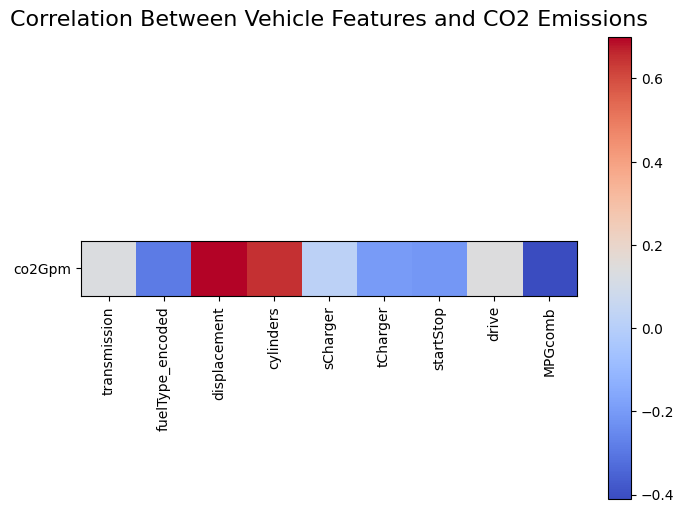

In [19]:
co2Gpm_correlations = correlation_matrix['co2Gpm'].drop('co2Gpm')
co2Gpm_correlations = co2Gpm_correlations.values.reshape(1, -1)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(co2Gpm_correlations, cmap='coolwarm')

ax.set_title('Correlation Between Vehicle Features and CO2 Emissions', pad=155, fontsize=16)
ax.set_xticks(range(len(selected_columns)-1))
ax.set_yticks([0])
ax.set_xticklabels(selected_columns[:-1], rotation=90)
ax.set_yticklabels(['co2Gpm'])

cbar = ax.figure.colorbar(im, ax=ax)

plt.show()


### Correlations
A correlation matrix was calculated to understand the relationships between various factors and CO2 emissions (co2Gpm). The matrix shows the correlation coefficients between each factor and the target variable.

Based on the correlation matrix, it can be observed that displacement and cylinders have relatively strong positive correlations with CO2 emissions. This suggests that vehicles with larger engine displacements, and more cylinders, tend to have higher CO2 emissions. On the other hand, MPGcomb, startStop (start-stop technology), and tCharger (turbocharger) show negative correlations with CO2 emissions. This implies that vehicles with higher MPGcomb, start-stop technology and turbochargers tend to have lower CO2 emissions.

### Model Approach

Multilinear regression will be used to understand which features might influence CO2 emissions of vehicles. This model allows for consideration of joint influence of multiple features on CO2 emissions. Multilinear regression also allows for investigating interaction effects between the independent variables. This was chosen over linear regression to potentially improve the accuracy of predictions with greater understating of how characteristics contribute to CO2 emissions.

Calculating the Variance Inflation Factor, it is clear that displacement and cylinders are highly correlated, with values way above 10, in the 50+ range. This could lead to multicollinearity issues. Cylinders was removed from the features set for multilinear regression analysis.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Select the independent variables (features) and the target variable
# Make sure to include only numerical columns as features
features = ['transmission','fuelType_encoded', 'displacement', 'sCharger', 'tCharger', 'startStop', 'drive', 'MPGcomb']
target = 'co2Gpm'

# Split the dataset into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multilinear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the variance of the target variable
target_variance = np.var(y_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the coefficients and MSE
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Variance of Target Variable:", target_variance)
print("Mean Squared Error:", mse)

Coefficients: [  9.72112937 -13.91262202  65.56300826 -39.40748289 -26.73283542
 -71.66275058  28.64226015  -1.98968084]
Intercept: 422.3901757384634
Variance of Target Variable: 25342.678373547056
Mean Squared Error: 11073.092690888176


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = X_train
vif = pd.DataFrame()
vif['Feature'] = vif_data.columns
vif['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

print(vif)


            Feature       VIF
0      transmission  3.802049
1  fuelType_encoded  6.890302
2      displacement  5.139888
3          sCharger  1.056777
4          tCharger  1.609608
5         startStop  1.640942
6             drive  1.531361
7           MPGcomb  5.388769


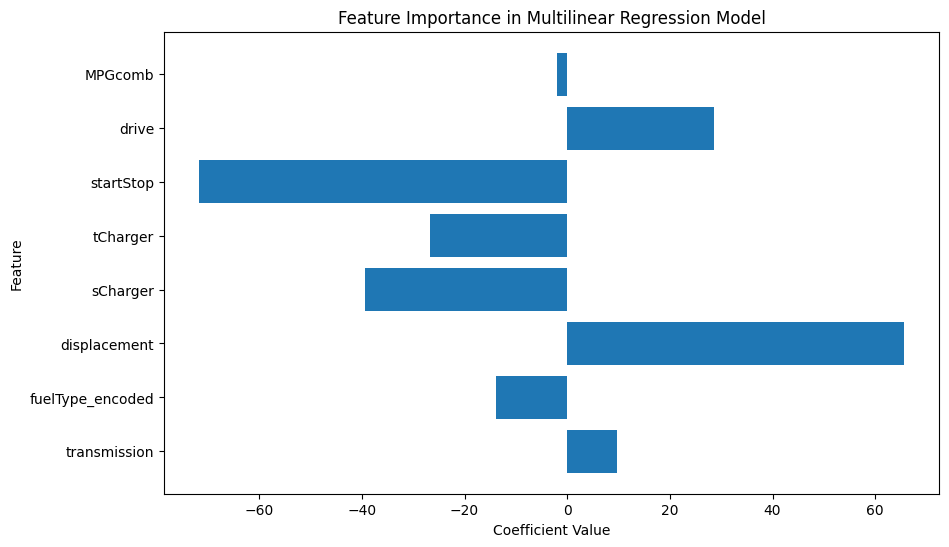

In [22]:
# Get the coefficients from the model
coefficients = model.coef_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Multilinear Regression Model')
plt.show()

 Start-stop has the greatest magnitude negative coefficient value, meaning if the vehicle is equipt with start-stop then the CO2 g/mile will decrease. Displacement has the greatest magnitude positive coefficient value, meaning as the vehicle has a larger volume engine, the CO2 g/mile will increase. Drive type and forced induction(tCharger and sCharger) also seem to have significant impacts.

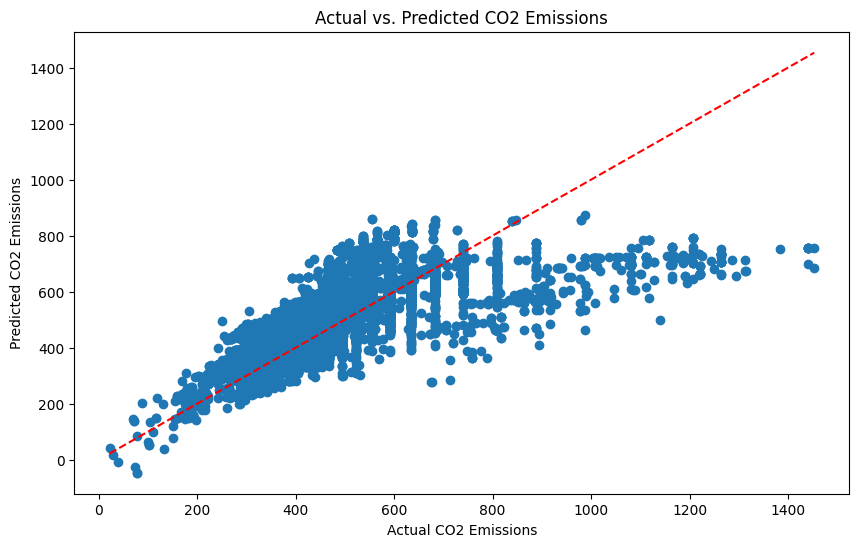

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.show()

If all predictions were perfect, they would all lay on the red line. This scatter plot shows that around 700 g/mile of Actual CO2 Emissions, the prediction model becomes much less accurate. 

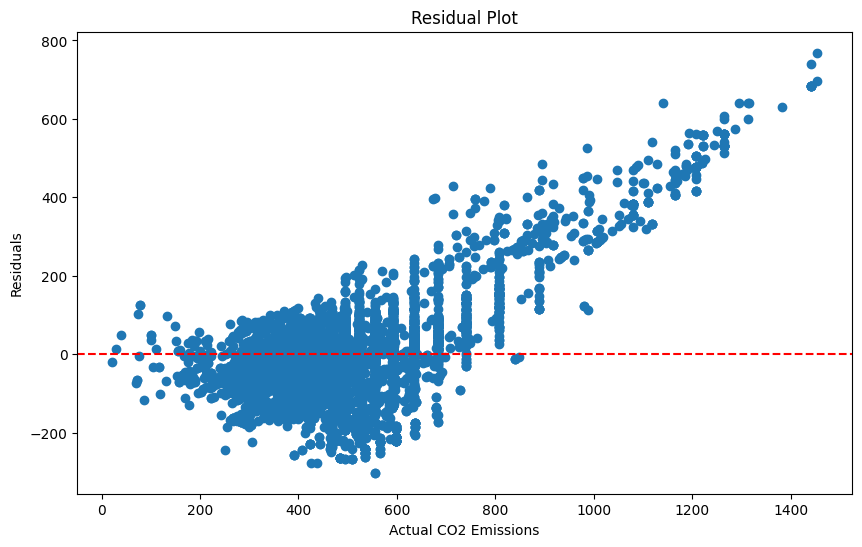

In [24]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The distribution of prediction errors (residuals) allow assessment of the model's performance. The model seems to overestimate a bit under actual 700 g/m CO2 Emissions. The model also seems to underestimate after 700 g/m CO2 Emissions.

### Results and Analysis

In this analysis, we aimed to understand the relationship between vehicle characteristics and CO2 emissions. We applied a multilinear regression model to predict CO2 emissions based on features such as transmission type, displacement and others. Our model demonstrated a reasonable fit to the data, with a Mean Squared Error (MSE) of 11073.09. To address potential interaction effects between cylinders and displacement, cylinders were removed from the model analysis.

For evaluation metrics, Mean Squared Error is the measure of prediction accuracy. Mean Squared Errors provide an appropriate indication for larger deviations from the true values. The model iteration process included the addition of interaction terms and assessing multicollinearity using Variance Inflation Factor (VIF). This approach addressed the potential influence of collinear features on model stability.

Multilinear regression is the focus due to its suitability for understanding joint influences of multiple features on CO2 emissions. The multilinear regression model was not compared to other methods, but the choice aligned with the goal of interpreting the effects of various features on CO2 emissions.

The multilinear regression model provided a means to understand the joint influence of various features on CO2 emissions. Through this analysis, an understanding of which characteristics play a significant role in determining emissions levels become better understood. This information can aid policymakers, manufacturers, and consumers in making informed decisions about vehicle design and environmental impact.

The multilinear regression model is decent in predicting CO2 emissions based on the selected vehicle characteristics. Unfortunately the model becomes less accurate after 700 g/mile of CO2.

The Feature Importance Plot provides a visual representation of the relative importance of each vehicle characteristic in influencing CO2 emissions. It is clear from the graph that the top influences are start-stop, displacement, super-charger, drive and turbo-charger.

By comparing actual CO2 emissions with predicted values from the model in a scatter plot, we visually assessed how well the model's predictions aligned with real-world observations. The model does a decent job at predictions until 700 g/mile, where the model becomes much less accurate.

The distribution of prediction errors (residuals) allow assessment of the model's performance. The model seems to overestimate a bit under actual 700 g/m CO2 Emissions. The model also seems to underestimate after 700 g/m CO2 Emissions.

### Conclusions

In this project, the aim was to analyze CO2 emissions based on vehicle characteristics and explore the potential factors that contribute to emission levels. Data cleaning and exploratory data analysis were used to gain insights into the relationships between the variables.

During the data cleaning process, features where removed, leaving those which might have an effect on CO2 emissions. Features such as Start-stop and Drive type were converted to 0 and 1 to be compared. Then vehicles with missing data were removed.

A scatter plot for each feature vs CO2 emissions was plotted next to the features frequency histogram. Percentiles, maxes, means and medians were calculated.

The displacement scatter plot shows that there is some variation in CO2 emissions across different displacements, indicating that displacement may impact the level of emissions. 

The cylinders scatter plot shows that there is some variation in CO2 emissions across different number of cylinders, indicating that number of cylinders may impact the level of emissions.

Looking at the MPG combined scatter plot, there is a negative trend as MPG combined increases the CO2 emissions decreases. If a vehicle is burning less fuel per mile, it might also produce less emissions from burning less fuel.
There are also three groupings, which are not divided by cylinder count. The origin of the separation is unknown.

The fuel type most of the vehicles burn is Regular or Premium Gasoline in the dataset, followed by a smaller number of diesel, hybrid, and electric cars. The Scatter plot shows Electric and Hybrid Vehicles seem to have the lowest emissions output. Gasoline and Diesel seem to have similar emissions followed by E85 with the highest output of CO2.

The Start-stop histogram shows 39336 vehicles have Start-stop and 6476 do not. The Start-stop scatter plot shows that there is some variation in CO2 emissions across having Start-stop and not, indicating that the Start-stop may impact the level of emissions. Start-stop equipped vehicles seem to have significantly lower CO2 emissions output possibilities.

Finally correlation coefficients and a correlation matrix were created.\ Some to note are the following:

displacement        0.698612\
cylinders           0.647915\
Higher displacement and cylinders is associated with higher CO2 emissions.

MPGcomb            -0.411882\
startStop          -0.211533\
MPGcomb increases and a vehicle is equipped with Start-stop, is associated with lower CO2 emissions.

The multilinear regression model does a decent job at predictions until 700 g/mile, where the model becomes much less accurate. Next time it would be reasonable to add a few more models and compare which model is the best fit. This may better capture the interactions and allow for better predictions by the new regression model. 